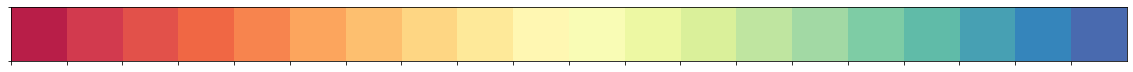

In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [51]:
a_keggs_full = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/homogenuous_clusters_archaea.tsv')[['protein', 'cluster', 'ids', 'id', 'description']]
a_keggs_full = a_keggs_full[a_keggs_full.id !='K09909']
a_keggs_full.head()

protein  cluster       ids      id  \
0  GUT_GENOME139173.fasta_357        1  a_135737  K12706   
1  GUT_GENOME105868.fasta_196        1  a_135737  K12706   
2  GUT_GENOME104819.fasta_673        1  a_135737  K12706   
3  GUT_GENOME048336.fasta_939        1  a_135737  K12706   
4  GUT_GENOME280278.fasta_484        1  a_135737  K12706   

                            description  
0  novobiocin biosynthesis protein NovC  
1  novobiocin biosynthesis protein NovC  
2  novobiocin biosynthesis protein NovC  
3  novobiocin biosynthesis protein NovC  
4  novobiocin biosynthesis protein NovC

In [52]:
bac_annot = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/bacteria_kegg_gut_functions_annotation.csv',
           sep='\t')

bac_annot.rename(columns={'cluster':'PFs'}, inplace=True)
bac_annot.drop_duplicates(inplace=True)

In [55]:
bac_annot.head()

protein        PFs      id  \
0       3300029099_20_451  b_6914379  K03210   
2       3300029381_21_762  b_6914379  K03210   
4       3300029793_21_645  b_6914379  K03210   
6       3300029850_21_685  b_6914379  K03210   
8  GUT_GENOME217547_37_23  b_6914379  K03210   

                           description  
0  preprotein translocase subunit YajC  
2  preprotein translocase subunit YajC  
4  preprotein translocase subunit YajC  
6  preprotein translocase subunit YajC  
8  preprotein translocase subunit YajC

In [74]:
bac_clusters = bac_annot.merge(a_keggs_full[['id', 'cluster']], on='id').rename(columns={'cluster':'archaeal_cluster'})
bac_clusters = bac_clusters.drop_duplicates(['protein', 'id', 'archaeal_cluster'])
bac_clusters.head()

protein        PFs      id  \
0   GUT_GENOME055807_18_44  b_6232387  K10742   
10   GUT_GENOME044254_9_31  b_6232387  K10742   
20   GUT_GENOME105860_43_7  b_6232387  K10742   
30   GUT_GENOME212645_2_68  b_6232387  K10742   
40  GUT_GENOME164096_47_24  b_6232387  K10742   

                                    description  archaeal_cluster  
0   DNA replication ATP-dependent helicase Dna2               202  
10  DNA replication ATP-dependent helicase Dna2               202  
20  DNA replication ATP-dependent helicase Dna2               202  
30  DNA replication ATP-dependent helicase Dna2               202  
40  DNA replication ATP-dependent helicase Dna2               202

In [75]:
bac_clusters['protein'] = 'b_' + bac_clusters['protein'].astype(str)

In [76]:
bac_clusters

protein        PFs      id  \
0       b_GUT_GENOME055807_18_44  b_6232387  K10742   
10       b_GUT_GENOME044254_9_31  b_6232387  K10742   
20       b_GUT_GENOME105860_43_7  b_6232387  K10742   
30       b_GUT_GENOME212645_2_68  b_6232387  K10742   
40      b_GUT_GENOME164096_47_24  b_6232387  K10742   
...                          ...        ...     ...   
160621       b_3300029698_26_768  b_2114628  K21691   
160626  b_GUT_GENOME049425_23_10  b_2114628  K21691   
160631       b_3300029043_11_918  b_2114628  K21691   
160636  b_GUT_GENOME190770_2_216  b_2114628  K21691   
160641  b_GUT_GENOME257573_4_100  b_2114628  K21691   

                                        description  archaeal_cluster  
0       DNA replication ATP-dependent helicase Dna2               202  
10      DNA replication ATP-dependent helicase Dna2               202  
20      DNA replication ATP-dependent helicase Dna2               202  
30      DNA replication ATP-dependent helicase Dna2               202  
40      DNA replication ATP-dependent helicase Dna2               202  
...                                             ...               ...  
160621          resuscitation-promoting factor RpfE               196  
160626          resuscitation-promoting factor RpfE               196  
160631          resuscitation-promoting factor RpfE               196  
160636          resuscitation-promoting factor RpfE               196  
160641          resuscitation-promoting factor RpfE               196  

[14647 rows x 5 columns]

In [77]:
merged = pd.concat([bac_clusters[['protein', 'id']], a_keggs_full[['protein', 'id']]], axis=0)

In [86]:
merged.sort_values('id').to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_for_phyl_trees_homogenuous_clusters_VS_bacterial_clusters_w_same_keggs.tsv',
                               sep='\t', index=None, header=None)


b 14647 
a 831